# Исследование закономерностей успешности игр

В вашем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные доступны за промежуток до 2016 года включительно

**Цель исследования:**
1. Изучить, как менялись продажи по платформам.
2. Определить актуальный период.
3. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
4. Изучить распределение игр по жанрам

**Ход исследования**

Данные об играх я получу из файла '/datasets/games.csv.'. О качестве данных ничего неизвестно, поэтому прежде чем приступать к целям исследования, понадобится обзор данных.

Данные будут проверены на ошибки, дубликаты и выбросы. Я поищу возможности исправить все ошибки данных, при этом избежав серьёзного искажения конечного результата. Далее будут созданы необходимые для анализа столбцы и будет проведён исследовательский анализ данных.

Таким образом, моё исследование будет состоять из следующих этапов:
1. Обзор данных
2. Предобработка данных
3. Рассчёты и добавление результатов в таблицу
4. Исследоватльский анализ
5. Написание общего вывода

## Знакомство с данными.
**Познакомимся с первыми строками таблицы**

In [1]:
from matplotlib import pyplot as plt
from numpy import nan
import pandas as pd


df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Получим общие сведения**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Построим общую гистограмму для всех числовых столбцов таблицы**

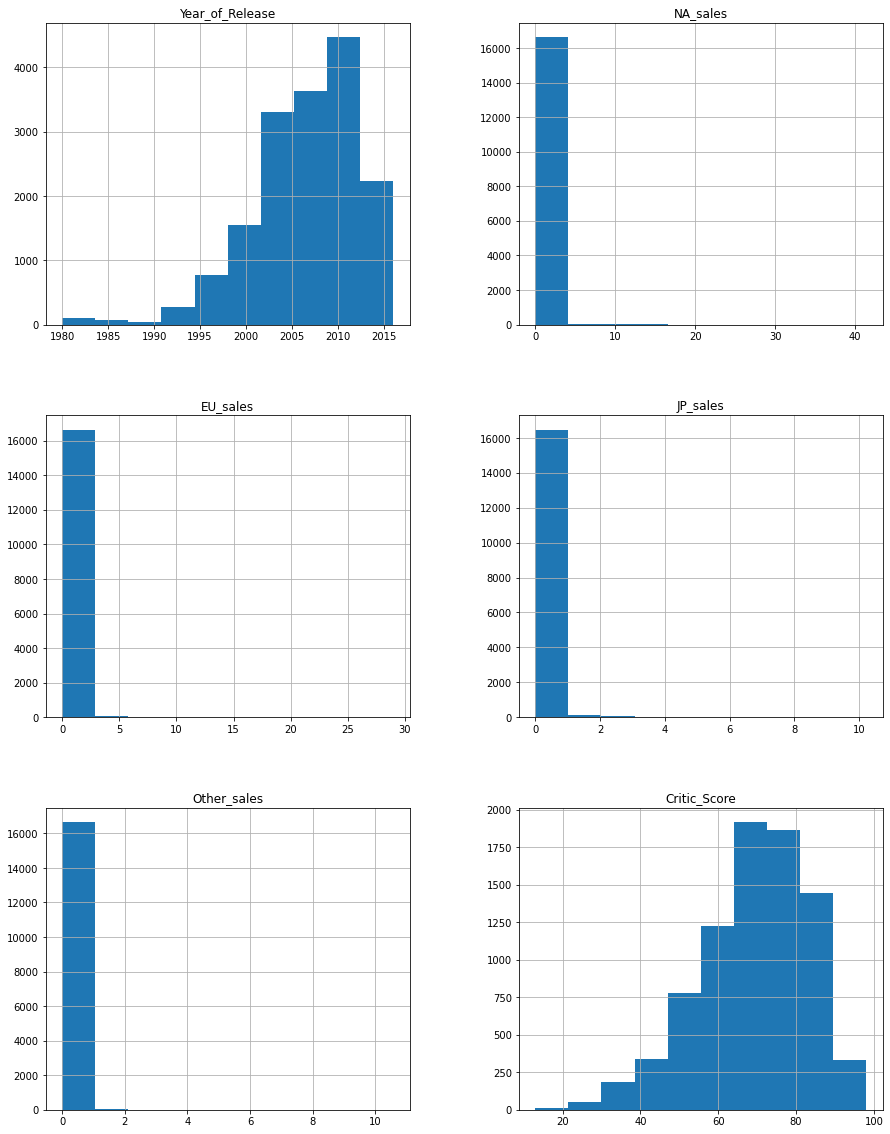

In [3]:
df.hist(figsize=(15, 20));

**Выше представлена основная информация о данных, включённых в таблицу. Всего в таблице 16715 строк и 11 колонок. В 6 из 11 колонок наблюдаются пропущенные значения. Также в ряде колонок (Other_sales, JP_sales, EU_sales, NA_sales) наблюдается неравномерное распределение записей: основной массив записей находится в небольшом диапазоне, а единичные записи довольно сильно из него выбиваются.**

## Предобработка данных

### Переименование колонок

**Названия колонок не соответствуют общепринятому правилу наименования столбцов в змеином регистре. Приведём названия столбцов к змеиному регистру.**

In [4]:
df.columns = df.columns.str.lower()

### Устранение неявных дубликатов

**Проверим, присутствуют ли в выборке явные дубликаты.**

In [5]:
df.duplicated().sum()

0

**Явные дубликаты не обнаружены**

In [6]:
print(df.duplicated(subset=['name', 'platform']).sum())
df = df.drop_duplicates(subset=['name', 'platform'], keep='first')
df.duplicated(subset=['name', 'platform']).sum()

5


0

**Удалено 5 неявных дубликатов: строк, в которых название игры и платформы дублируются. В датасете сохранены данные первой встречающейся записи.**

### Обработка пропусков

**Выведим количество пропущенных значений для каждого столбца**

In [7]:
df.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

**Один пропуск есть в столбце "name". Это ключевое значение, найти какую-либо адекватную замену этому значению не представляется возможным. Наиболее верным представляется удаление этой строки. Также наблюдается относительно небольшое количество пропусков в столбце "year_of_release". Отсутствует 268 значений. В рабочем проекте мы бы могли постараться найти открытую базу по играм и попытаться найти в ней данные через скрипт или мануально (при единичных пропусках). Однако так как удельный вес пропусков невелик, удаление строк не должно сильно сказаться на результатах анализа. Удалим также строки с пропусками в "year_of_release". Пропуски в этих данных могут быть вызваны несовершенством базы данных, возможно данные об этих играх подтягивались не из тех баз.**

In [8]:
df = df.dropna(subset=['name', 'year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**Пропуски в столбце "rating" могут негативно влиять на результаты анализа, заменим их на "no_data". Остальное оставим с пропусками**

In [9]:
df['rating'] = df['rating'].replace(nan, 'no_data')

**Пропуски в стобце "rating"**

### Корректировка типов данных

**Перед корректировкой типов данных необходимо обработать текстовое значение 'tbd' в столбце 'user_score'. Это значение по всей видимости расшифровывается как to be determined, подлежит уточнению. В нашем случае это равносильно отсутствующему значению. Заменим значения 'tbd' на Nan.**

In [10]:
df['user_score'] = df['user_score'].replace('tbd', nan)

**В столбце year_of_release тип данных float, вещественные числа. Это не вполне корректный тип данных для годов. Приведём его к целым числам, int. Тип данных в столбце user_score - object. Это также некорректный тип данных для столбца содержащего вещественные числа. Прведём его к float.**

In [11]:
df['year_of_release'] = df['year_of_release'].astype(dtype='int')
df['user_score'] = pd.to_numeric(df['user_score'])

### Суммарные продажи во всех регионах

**Добавим в таблицу столбец с данными по продажам во всех регионах: total_sales.**

In [12]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_data,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_data,31.38


**В результате предобработки данных названия колонок были приведены к нижнему регистру. Также были выявлены и устранены несколько неявных дубликатов. Часть столбцов содержала пропуски. В зависимости от количества пропусков и характера данных часть строк с пропусками была удалена, часть пропусков заменена на дефолтные значения, часть - сохранена. Также были скорректированы типы данных.**

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы?

**Получим данные по количеству игр, выпущенных в различные годы, и отсортируем данные по убыванию, чтобы выделить годы с самым большим количеством данных.**

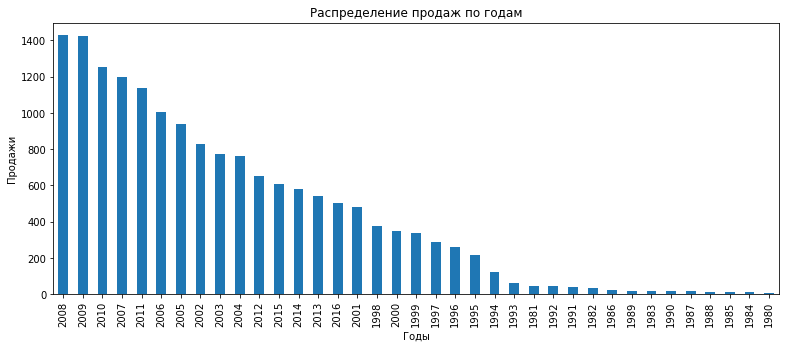

In [13]:
ax = df.groupby('year_of_release')['name'].count().sort_values(
    ascending=False).plot(
    kind='bar',
    figsize=[13, 5],
    xlabel='Годы',
    ylabel='Продажи',
    title='Распределение продаж по годам',
)
plt.show()

**Как можно заметить, наибольшее количество игр выпускалось после 2000 года за редким исключением. Данные за эти годы и имеет смысл анализировать. Наибольшее количество данных в выборке собрано по следующим годам: 2008, 2009, 2010, 2007, 2011, 2006.**

### Как менялись продажи по платформам?

**Сгруппируем продажи по платформам, сложим общую сумму продаж и отсортируем по убыванию.**

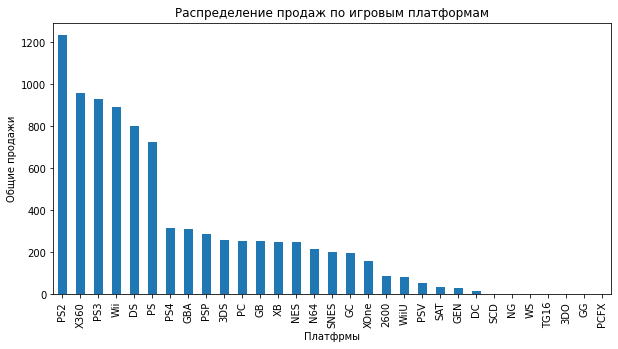

In [14]:
grouped_by_platform = df.groupby(
    'platform')['total_sales'].sum().sort_values(
    ascending=False)
grouped_by_platform.plot(
    kind='bar',
    figsize=[10, 5],
    xlabel='Платфрмы',
    ylabel='Общие продажи',
    title='Распределение продаж по игровым платформам'
);

In [15]:
top_platforms = grouped_by_platform.head(10).index
top_pivot = df.query('platform in @top_platforms').pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)
top_pivot

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


**В данных мы видим выброс по платформе DS: данные о продажах за 1985 год, когда эта консоль ещё не была создана(2004). Удалим эти данные и построим визуализацию**

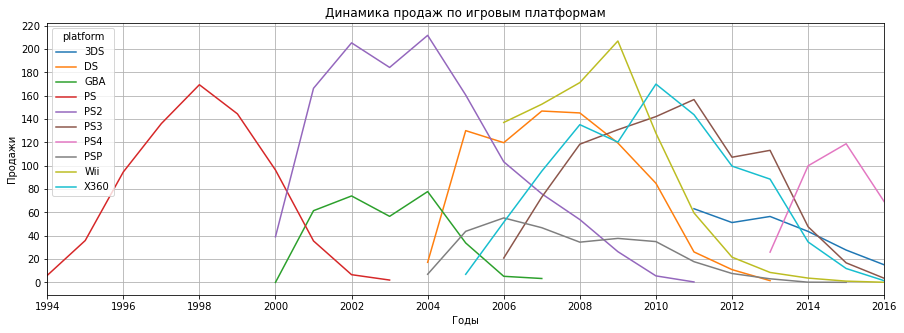

In [16]:
df[df['platform'] == 'DS'] = df.query('platform == "DS" and year_of_release != 1985')
(
    top_pivot.plot(
        xlabel='Годы',
        ylabel='Продажи',
        title='Динамика продаж по игровым платформам',
        grid=True, figsize=(15, 5)
    )
)
plt.locator_params(nbins=20)
plt.xlim(1994, 2016)
plt.show()

**Из графика выше можно сделать вывод, что в среднем продолжительность жизни ведущих платформ была в районе 10 лет, при этом пика продаж игр они достигали где-то через 2-4 года.**

### Какие платформы лидируют на ограниченном временном диапазоне?

**Для начала выберем наиболее наиболее актуальный период в рамках которого будем в дальнейшем анализировать все данные. Так как нас интересует прогноз на 2017 и потенциально следующие годы, логичнее будет выбрать порядка 3 лет наиболее приближённых к 2017: 2014-2016. По каждому из этих годов в выборке примерно 500-600 записей. В переменную "latest_data" сохраним срез с данными за 2014-2016 гг. В дальнейшем будем проводить анализ этих данных.**

In [17]:
latest_data = df[df['year_of_release'] >= 2014]
latest_data['year_of_release'].unique()

array([2015., 2014., 2016.])

In [18]:
latest_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

**Из полученных выше данных можно сделать вывод, что первые три места по общим продажам занимают:**
1. PS4
2. XOne
3. 3DS

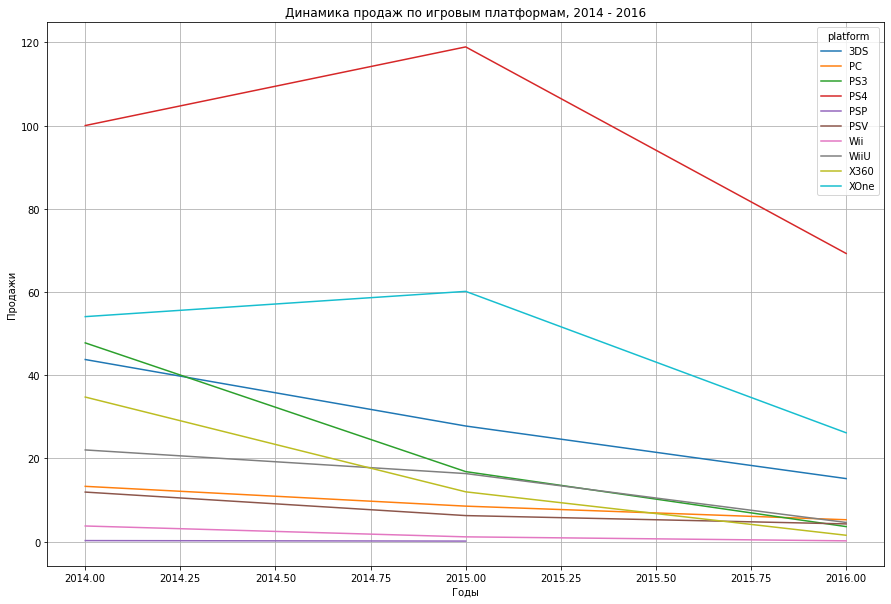

In [19]:
(
    latest_data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(xlabel='Годы', ylabel='Продажи', title='Динамика продаж по игровым платформам, 2014 - 2016', grid=True, figsize=(15, 10))
)
plt.show()

**На графике мы видим, что уровень продаж игр практически по всем платформам снижается с 2015 по 2016 годы. Это довольно интересная динамика, которая потенциально может свидетельствовать о недостаточности или неполноте данных за 2016 год. При этом можно отметить, что продажи игр на 3DS стабильно снижались на протяжении всех 3-х лет, что может свидетельствовать о том, что эта консоль хоть и находится в лидерах по продажам, но постепенно достигает окончания своего жизненного цикла. Оставим в данных только информацию по 8 наиболее популярным платформам. Продажи по двум последним в рейтинге стремятся к 0.**

In [20]:
top_platforms = latest_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(8).index
latest_data = df.loc[(df['year_of_release'] >= 2014) & (df['platform'].isin(top_platforms))]
latest_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'PSV'],
      dtype=object)

**Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам.**

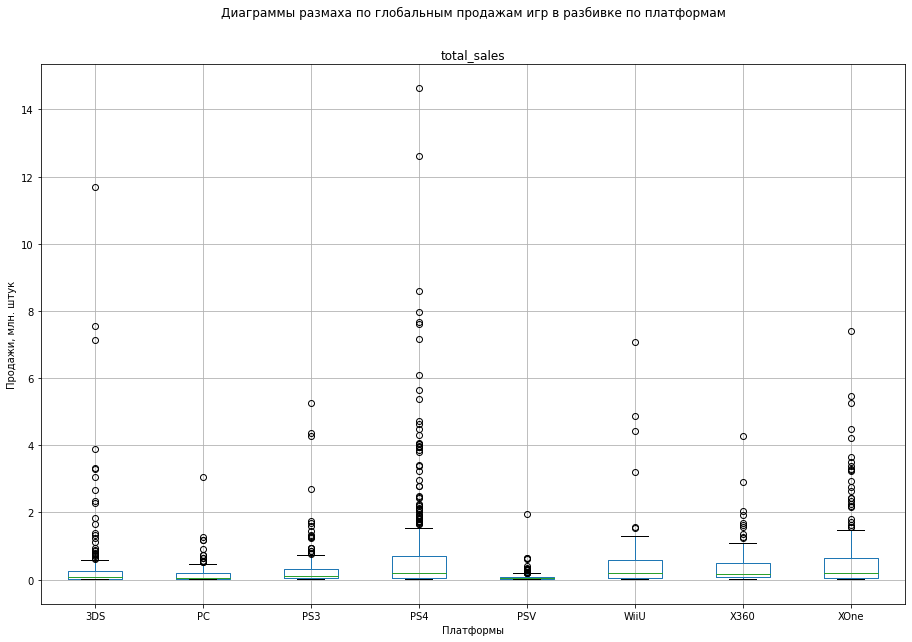

In [21]:
latest_data.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн. штук')
plt.suptitle('Диаграммы размаха по глобальным продажам игр в разбивке по платформам')
plt.show()

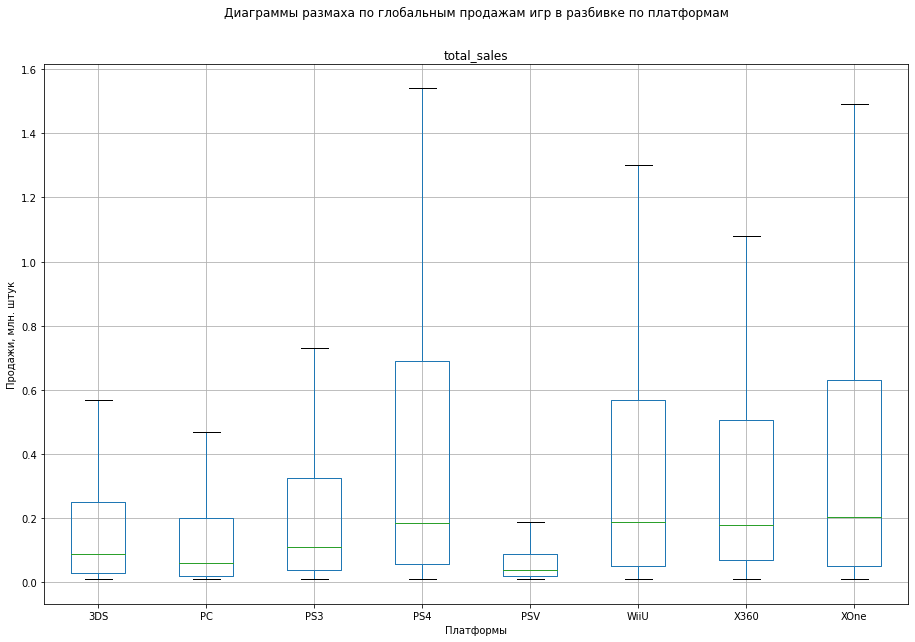

In [22]:

latest_data.boxplot(column='total_sales', by='platform', figsize=(15, 10), showfliers=False)
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн. штук')
plt.suptitle('Диаграммы размаха по глобальным продажам игр в разбивке по платформам')
plt.show()

**Мы видим, что в среднем медиана колеблется между 0.1 и 0.2 млн. проданных копий. При этом у ведущих платформ наблюдается большое количество выбросов вверх. Это может свидетельствовать о существенном количестве крайне популярных игр, которые выходили именно под эти платформы. Можно также заметить прямую зависимость количества выбросов вверх от уровня общих продаж.**

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

**Самой популярной платформой среди исследуемых на отрезке 2014-2016 гг. является PS4. Рассмотрим как отзывы критиков и пользователей влияли на продажи игр для этой платформы.**

'Корреляция между отзывами критиков и общими продажами для PS4 = 0.40266141068104083'

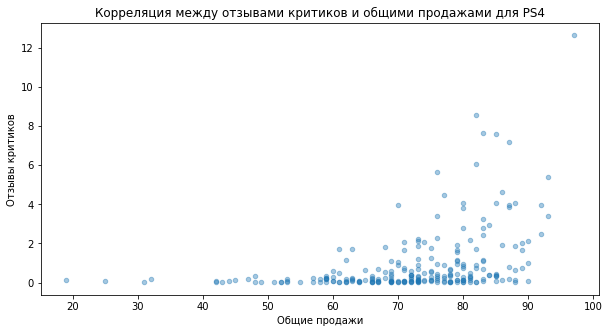

In [23]:
latest_data_ps4 = latest_data[latest_data['platform'] == 'PS4']
ps4_critic_corr = latest_data_ps4['critic_score'].corr(latest_data_ps4['total_sales'])
display(f'Корреляция между отзывами критиков и общими продажами для PS4 = {ps4_critic_corr}')
latest_data_ps4.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.4,
    figsize=[10, 5],
    xlabel='Общие продажи',
    ylabel='Отзывы критиков',
    title='Корреляция между отзывами критиков и общими продажами для PS4'
);

'Корреляция между отзывами пользоватлей и общими продажами для PS4 = -0.040131589472697356'

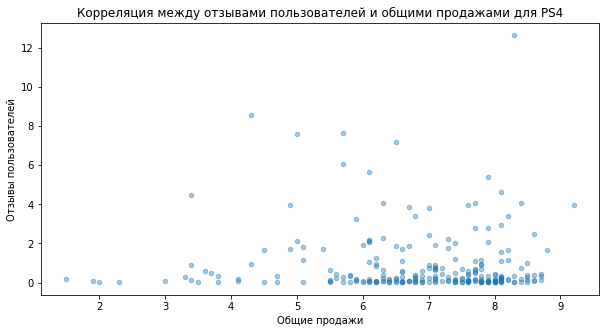

In [24]:
ps4_user_corr = latest_data_ps4['user_score'].corr(latest_data_ps4['total_sales'])
display(f'Корреляция между отзывами пользоватлей и общими продажами для PS4 = {ps4_user_corr}')
latest_data_ps4.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.4,
    figsize=[10, 5],
    xlabel='Общие продажи',
    ylabel='Отзывы пользователей',
    title='Корреляция между отзывами пользователей и общими продажами для PS4'
);

**Проведём аналогичные рассчёты всех платформ**

'Корреляция между отзывами критиков и общими продажами = 0.328105086966363'

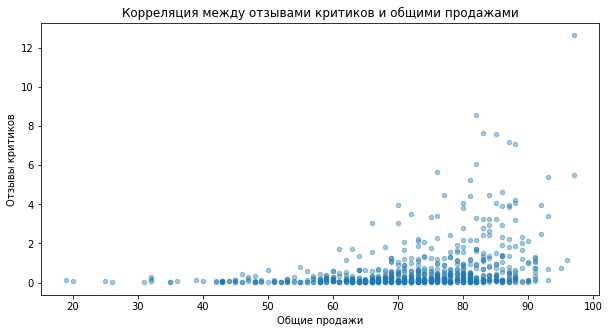

In [25]:
critic_corr = latest_data['critic_score'].corr(latest_data['total_sales'])
display(f'Корреляция между отзывами критиков и общими продажами = {critic_corr}')
latest_data.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.4,
    figsize=[10, 5],
    xlabel='Общие продажи',
    ylabel='Отзывы критиков',
    title='Корреляция между отзывами критиков и общими продажами'
);

'Корреляция между отзывами пользователей и общими продажами = -0.01476927594638269'

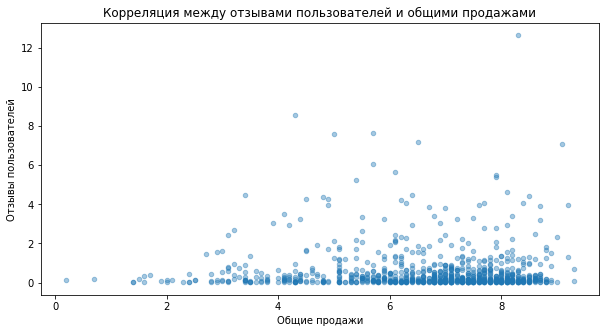

In [26]:
user_corr = latest_data['user_score'].corr(latest_data['total_sales'])
display(f'Корреляция между отзывами пользователей и общими продажами = {user_corr}')
latest_data.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.4,
    figsize=[10, 5],
    xlabel='Общие продажи',
    ylabel='Отзывы пользователей',
    title='Корреляция между отзывами пользователей и общими продажами'
);

**Исходя из построенных диаграмм рассеяния и рассчитанных корелляций, можно говорить о том, что как в случае с оценками пользователей, так и в случае с оценками критиков корреляция выражена не очень ярко. Однако если в случае с пользователями она отрицательная и практически равна 0, то в случае с критиками она положительная и составляет примерно 0.32, последнее может свидетельствовать о наличии слабо выраженной зависимости между оценками критиков и продажами игр. Это и всё последующее справедливо и для PS4 отдельно, и для всех других консолей. Тем не менее, важно отметить, что именно в столбцах с оценками пользователей и критиков было наибольшее количество пропусков, вплоть до 50%, поэтому имеющиеся данные нельзя назвать полностью репрезентативными. Такое количество пропусков легко могло привести к критичным искажениям.**

### Распространение игр по жанрам

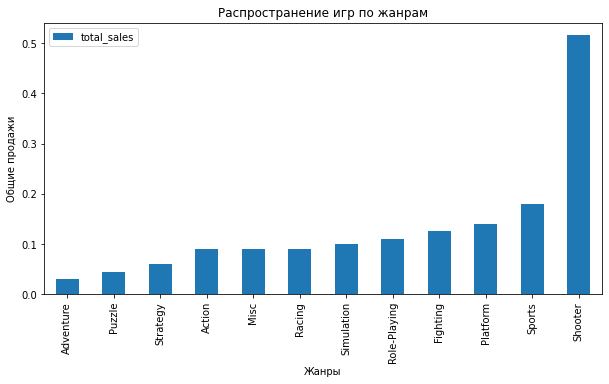

In [27]:
genre_pivot = latest_data.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='median'
).sort_values(by='total_sales')
genre_pivot.plot(
    kind='bar',
    figsize=[10, 5],
    xlabel='Жанры',
    ylabel='Общие продажи',
    title='Распространение игр по жанрам'
);


**На графике выше мы можем увидеть, что лидерами по продаже являются игры в жанре Shooter, в топ 4 входят также игры в жанрах Sports, Platform, Fighting. Самыми же непопулрными являются жанры Puzzle и Adventure.**

## Портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

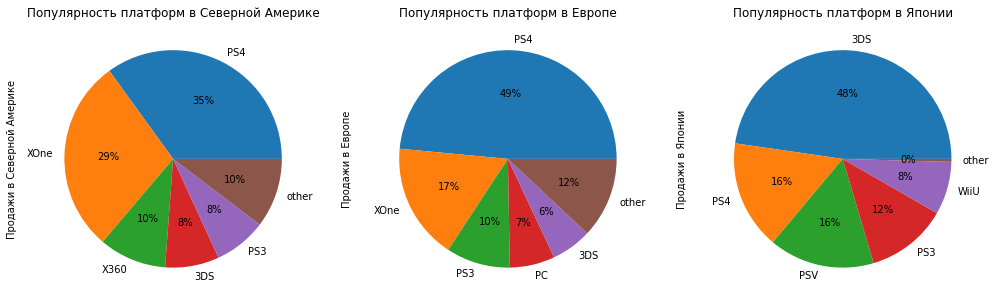

In [28]:
def draw_pies(
    group_by: str,
    regions: list[str],
    subtitles: list[str],
    region_num: int,
    ylabels: list[str]
) -> None:
    fig, axes = plt.subplots(nrows=(region_num + 2) // 3, ncols=3, figsize=[17, 5])
    for i in range(region_num):
        all_grouped = latest_data.groupby(by=group_by)[regions[i]].sum().sort_values(ascending=False)
        top_grouped = all_grouped.head(5)
        if len(all_grouped) > 5:
            top_grouped['other'] = all_grouped[5:].sum()
        top_grouped.plot(kind='pie', ax=axes[i], autopct='%.0f%%')
        axes[i].set_ylabel(ylabels[i], labelpad=20)
        axes[i].set_title(subtitles[i])


regions = ('na_sales', 'eu_sales', 'jp_sales')
ylabels = ('Продажи в Северной Америке', 'Продажи в Европе', 'Продажи в Японии')
subtitles_platforms = (
    'Популярность платформ в Северной Америке',
    'Популярность платформ в Европе',
    'Популярность платформ в Японии'
)
draw_pies(
    group_by='platform',
    regions=regions,
    subtitles=subtitles_platforms,
    region_num=3,
    ylabels=ylabels
)

**Мы можем отметить, что показатели популярности платформ в странах Европы и Северной Америки практически совпадают: первое место занимает платформа 3DS, второе место за обобщённой группой "других" платформ, не вошедших в top 5. Третье место делят PS4 и PSV, 4 и 5 место за платформами PS3 и WiiU. Ситуация в Японии схожа по позициям в рейтинге, но тут наблюдается ряд важных отличий: первое место всё так же за 3DS, однако её отрыв от других уже существенно выше - 48% от общих продаж. Категория же "другие" тут практически не представлена.**

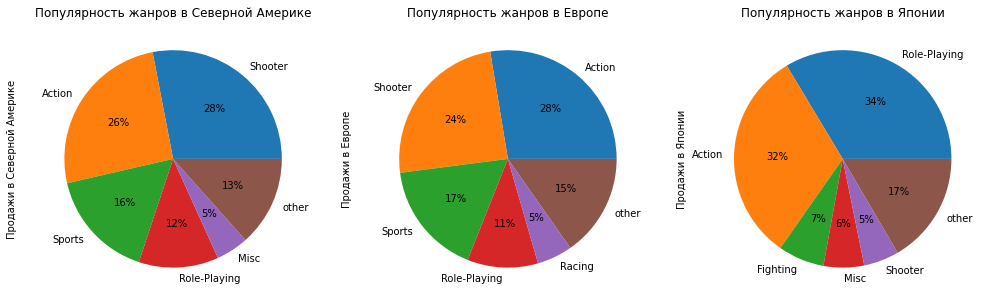

In [29]:
subtitles_platforms = (
    'Популярность жанров в Северной Америке',
    'Популярность жанров в Европе',
    'Популярность жанров в Японии'
)
draw_pies(
    group_by='genre',
    regions=regions,
    subtitles=subtitles_platforms,
    region_num=3,
    ylabels=ylabels
)

**Согласно графикам, показатели популярности жанров в странах Европы и Северной Америки также весьма схожи, однако тут наблюдается уже больше отличий. В Северной Америке первое место за жанров Shooter, второе - за Action, в Европе наоборот №1 - Action, №2 - Shooter. Далее в обоих случаях 3 и 4 место занимают соответственно Sports и Role-Playing. В Америке на 5-м месте находится Music, в Европе - Racing. Ситуация в Японии ощутимо отличается: первое место занимает Role-Playing, второе - Action, на них приходится 66% общих продаж. Далее небольшие проценты приходятся на 3, 4 и 5 места: Fighting, Music и Shooter соответственно. На другие жанры во всех 3 регионах приходится от 13% до 17% общих продаж. Вышеописанные различия могут быть обусловлены культурными причинами.**

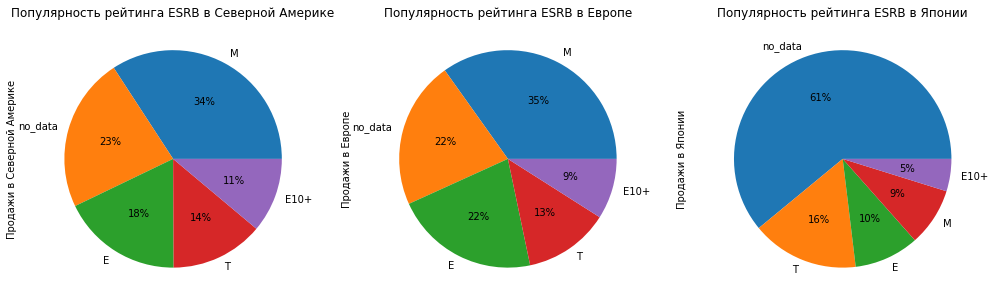

In [30]:
subtitles_platforms = (
    'Популярность рейтинга ESRB в Северной Америке',
    'Популярность рейтинга ESRB в Европе',
    'Популярность рейтинга ESRB в Японии'
)
draw_pies(
    group_by='rating',
    regions=regions,
    subtitles=subtitles_platforms,
    region_num=3,
    ylabels=ylabels
)

**Мы видим, что в Северной Америке и Европе практически идентичная ситуация:**
1. M
2. E
3. T
4. E10+
**При этом 22-23% продаж приходится на игры, у которых нет данных по рейтингу ESRB.**

**В случае с Японией сложно говорить о каких-то репрезентативных выводах, так как условное 1 место с долей продаж 61% занимают игры у которых нет данных по категории рейтинга ESRB. Далее идут:**
1. T
2. E
3. M
4. E10+
**Пропусков в данных по всем регионам слишком много, поэтому выводы могут быть ошибочны, однако можно осторожно утверждать, что в Европе и Северной Америке популярнее игры рейтинга М, а в Японии - Т.**

## Общий вывод

**При работе над этим проектом была выполнена предобработка данных, которая включала в себя заполнение пропусков, выявление явных и неявных дубликатов и их удаление. Была рассчитана общая сумма продаж по всем регионам, которая в дальнейшем использовались для анализа датасета. В рамках аналитической части были рассмотрены вопросы: сколько игр выпускалось в разные годы, как менялись продажи по платформам, как влияют на продажи отзывы пользователей и критиков, что можно сказать о самых прибыльных жанрах.**

**В результате исследования мы пришли к следующим выводам:**
- **Наибольшее количество игр выпускалось после 2000 года за редким исключением**

- **Данные свидетельствуют о наличии слабо выраженной зависимости между оценками критиков и продажами игр. Связь между отзывами пользователей и продажами не выявлена.**

- **В среднем продолжительность жизни ведущих платформ была в районе 10 лет, при этом пика продаж игр они достигали где-то через 2-4 года.**

- **Из полученных выше данных можно сделать вывод, что первые три места по общим продажам занимают: 1. PS4, 2. XOne, 3. 3DS**

- **Глобальными лидерами по продаже являются игры в жанре Shooter, в топ 4 входят также игры в жанрах Sports, Platform, Fighting. Самыми же непопулрными являются жанры Puzzle и Adventure**

- **Показатели популярности платформ в странах Европы и Северной Америки практически совпадают: первое место занимает платформа 3DS, второе место за обобщённой группой "других" платформ, не вошедших в top 5. Третье место делят PS4 и PSV. В Японии первое место всё так же за 3DS, однако её отрыв от других уже существенно выше - 48% от общих продаж. Категория же "другие" тут практически не представлена**

- **Показатели популярности жанров в странах Европы и Северной Америки также весьма схожи, однако тут наблюдается уже больше отличий. В Северной Америке первое место за жанров Shooter, второе - за Action, в Европе наоборот №1 - Action, №2 - Shooter. Далее в обоих случаях 3 и 4 место занимают соответственно Sports и Role-Playing. В Америке на 5-м месте находится Music, в Европе - Racing. Ситуация в Японии ощутимо отличается: первое место занимает Role-Playing, второе - Action, на них приходится 66% общих продаж. Далее небольшие проценты приходятся на 3, 4 и 5 места: Fighting, Music и Shooter соответственно. На другие жанры во всех 3 регионах приходится от 13% до 17% общих продаж. Вышеописанные различия могут быть обусловлены культурными причинами**
- **В Европе и Северной Америке популярнее игры рейтинга М, а в Японии - Т.**